In [1]:
import pandas as pd
browsing_data = pd.read_csv('../static/user_browsing_hours.csv', usecols = ['username', 'hour'])
browsing_data.head()

username    hour
0      Taringa  14.798
1   alpaquitay  13.754
2    nuevorden  15.067
3       josezu  10.362
4  zendostrike  13.220

In [2]:
%pip install seaborn
%pip install ckwrap

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring instal

<Axes: >

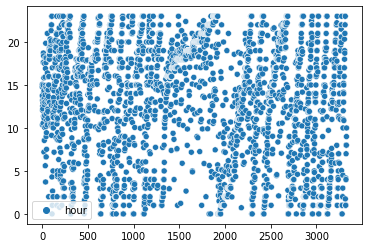

In [3]:
import seaborn as sns
sns.scatterplot(data = browsing_data)

In [4]:
# make each entry unique by adding an insignificant random number

from random import random

def random_text(size: int = 6) -> str:
    return str(random()).split(".")[1][:size]

def _add_random(x: float) -> float:
    _new = str(x) + random_text()
    return float(_new)

browsing_data["hour_random"] = [_add_random(value) for value in browsing_data["hour"].values]

In [5]:
browsing_data

username    hour  hour_random
0             Taringa  14.798    14.798169
1          alpaquitay  13.754    13.754949
2           nuevorden  15.067    15.067731
3              josezu  10.362    10.362925
4         zendostrike  13.220    13.228332
...               ...     ...          ...
3326         paolaksj   8.000     8.084534
3327        Crisnelam   8.000     8.021545
3328  robertorojas200   8.000     8.091342
3329           jowica   9.000     9.034670
3330     Eddiecaste76  10.000    10.029662

[3331 rows x 3 columns]

<Axes: xlabel='hour', ylabel='hour_random'>

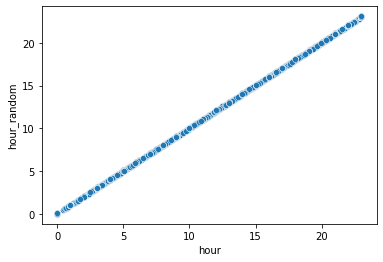

In [6]:
sns.scatterplot(data = browsing_data, x='hour', y='hour_random')

In [7]:
username_hour_mapping = browsing_data[["username", "hour_random"]].set_index('username').to_dict()["hour_random"]

In [8]:
username_hour_mapping

{'Taringa': 14.798168663,
 'alpaquitay': 13.754949199,
 'nuevorden': 15.067730737,
 'josezu': 10.362925299,
 'zendostrike': 13.22833238,
 'donoscarbonilla': 12.049908989,
 'AndreaVLK': 12.542321565,
 'enivid': 12.224706798,
 'Ale_Sabater': 13.187629831,
 'Nobody': 12.912836625,
 'FanFani': 10.549001527,
 'Kira9': 14.963581144,
 'Holly': 17.637796196,
 'oskr04': 18.721388963,
 'elitrimarchi': 17.627715057,
 'RamaSalemme': 11.361362675,
 'marinc3': 18.383988207,
 'iovreche': 14.172929115,
 'dist159': 15.829268337,
 'LaPipol': 7.197072325,
 'Maxlancer': 14.364696195,
 'DebyMagallanes': 11.125579382,
 'Pipo1995': 13.463113997,
 'SoyBarroar': 8.547545239,
 'mabgia': 12.704560317,
 'Chabeli_Espino1': 11.554048908,
 'andy_cr': 17.501555534,
 'christhoph': 10.063183661,
 'johndvann': 11.447680493,
 'alcriorne': 13.0618339,
 'DaniAnantes': 13.0217933,
 'UniversoGIA': 15.933711421,
 'archivodeautos': 13.834570246,
 'Gosia': 14.934740569,
 'six_to': 5.606665543,
 'francosaraceni': 18.181474489,
 

In [9]:
# check if mapping is unique

len(username_hour_mapping) == len(set(username_hour_mapping.values()))

True

In [10]:
# create hour-username mapping

hour_username_mapping = {value:key for key, value in username_hour_mapping.items()}

In [11]:
import ckwrap
import numpy as np

In [12]:
field = np.array(list(username_hour_mapping.values()))
n_clusters = 5
km = ckwrap.ckmeans(field, n_clusters)

In [13]:
km.centers

array([ 2.40226471,  8.14191332, 13.15906972, 17.66015072, 21.36823785])

In [14]:
buckets = [[] for _ in range(n_clusters)]

In [15]:
for i in range(len(field)):
    buckets[km.labels[i]].append(field[i])

In [16]:
buckets

[[3.7150437,
  2.0127555,
  4.302254165,
  0.0123285,
  1.0318704,
  2.662096302,
  2.0916535,
  2.0555548,
  5.0771581,
  2.0906679,
  1.0091568,
  2.089923,
  4.37885382,
  5.0981523,
  4.563809555,
  0.771519361,
  4.5454914,
  5.033472,
  4.0365804,
  3.912568921,
  1.0064195,
  3.604642498,
  3.0330914,
  2.0863382,
  3.833692218,
  5.0031277,
  2.0087347,
  3.0376068,
  0.0530965,
  0.0272587,
  0.0450442,
  0.0795832,
  3.56110353,
  1.0748681,
  1.0316831,
  2.934544164,
  1.0501105,
  2.0463581,
  3.649420851,
  2.0845355,
  2.0790185,
  2.315368615,
  2.0992452,
  5.18855239,
  2.673179021,
  2.888876296,
  2.0840352,
  1.383507296,
  3.0963386,
  3.0964324,
  3.505513772,
  0.0399788,
  3.918961484,
  1.605604008,
  0.48581438,
  4.251259248,
  1.0773517,
  3.751909952,
  4.91348951,
  2.46775168,
  3.363382648,
  4.008334839,
  2.0757011,
  2.0858929,
  3.0351137,
  3.0558143,
  4.0489226,
  4.0286251,
  4.858549806,
  4.0153709,
  5.0962937,
  4.532686887,
  4.0024516,
  2

In [17]:
members = [[hour_username_mapping[hour] for hour in bucket] for bucket in buckets]

In [18]:
members

[['NancyGay',
  'b15c9097d47a4d580bef748aa5f378f25fb597f7',
  'BaronSamDee',
  'Jeeper1971',
  'Mhibou',
  'ec5074b1b0f708131e29895a21bdc4885f483305',
  'Elejeronimo',
  'Luane',
  'Axel_E_Dragani',
  'Nekita',
  'Camii',
  'Galucocina',
  'nachiin214',
  'Logan_Mizuno',
  'dup2_taringa',
  'dup_ngh_sick',
  'agronomicus',
  'cornoman',
  'Bluewall',
  'cuarenta5',
  'DiegoMatiz',
  'Rafaeldeyuna',
  'cheloid',
  'SatirodelSobre',
  'Dr_Wallace',
  'OctaVl1',
  'Hector_AR',
  'd2e0ddd8ba0952306c7faeffb9ac63be70b4ef62',
  'diego',
  'teresa',
  'DiegoSP',
  'Emysshe_15',
  'exi_dev',
  'Lisandro',
  'esteredondo1387',
  'nicotalleres5',
  'Nicolax',
  'byia1995',
  'derota',
  'cyncaraballo',
  'jjpp1976',
  'tombria836',
  'Emma32',
  'carolina489c',
  'adrian3006',
  'pennylei',
  'mauriciosanch',
  'elMUDO',
  'david',
  'GeorgeCR2',
  'homerolll',
  'fakundoa',
  'diego271707',
  'Ekekocem',
  'Madera',
  'mundonorte',
  'SHIVER',
  'unpapahipster',
  'cbdiego2',
  'LEONCIO',
  'Cha

In [19]:
len(members[0])

692

In [20]:
len(members[1])

379

In [21]:
len(members[2])

711

In [22]:
len(members[3])

838

In [23]:
len(members[4])

711

<Axes: >

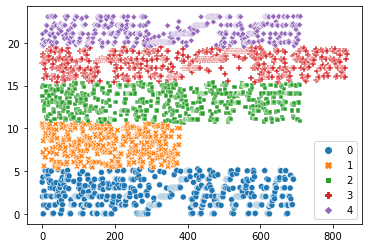

In [24]:
sns.scatterplot(data = buckets)